# Data wrangling and visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
bank_data = pd.read_csv("bank-full.csv")
df = bank_data
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [6]:
cols = [col for col in df.columns]

Now we check out which columns contain "unknown".

In [7]:
col_unknown = []
for col in cols:
    if "unknown" in df[col].values:
        col_unknown.append(col)
print(f'The following columns have "unknown" values: {col_unknown}')

The following columns have "unknown" values: ['job', 'education', 'contact', 'poutcome']


/var/folders/kn/1x22wpxj17s8kmrgdwrxdywh0000gn/T/ipykernel_34256/591132591.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if "unknown" in df[col].values:


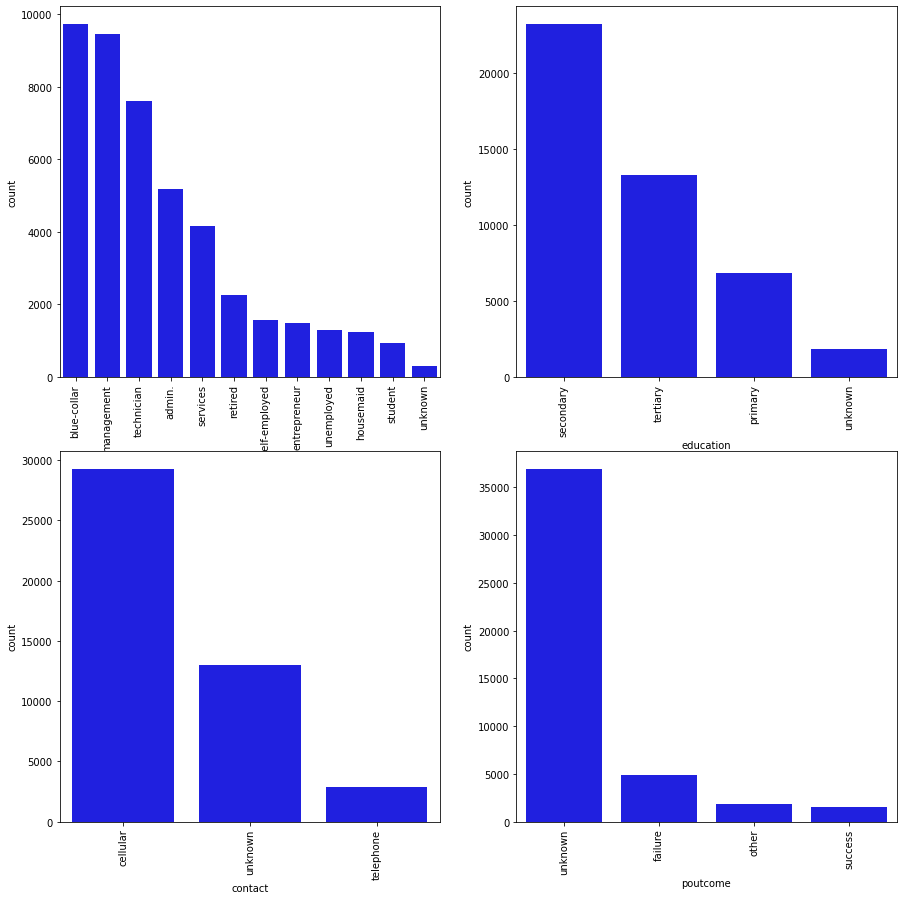

In [8]:
plt.figure(figsize=(15, 15))
i = 1
for col in col_unknown:
    plt.subplot(2, 2, i)
    i = i + 1
    sns.countplot(x=col, data=df, color='blue', 
              order=df[col].value_counts().index);
    plt.xticks(rotation = 90)

From the above plots we can see that variable `poutcome` contains a large number of "unknown". 

And we could not assert anything from the "unknown" data. Hence we remove the `poutcome` variable.

In [9]:
df = df.drop(["poutcome"], axis=1)
df.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,no


Now since `contact` variable also contains lots of "unknown", we draw the following plots to check the influence of `contact`.

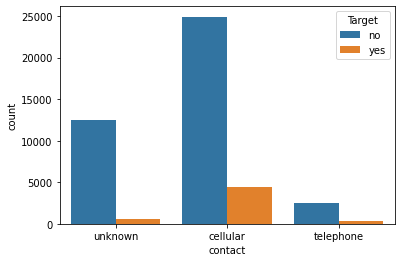

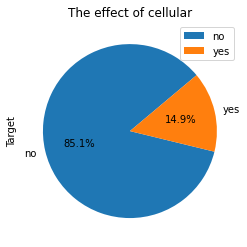

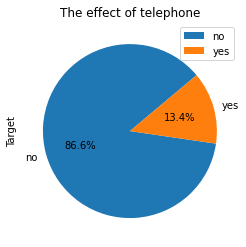

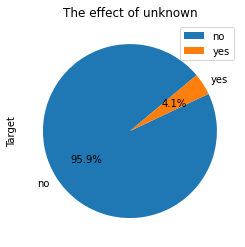

In [10]:
sns.countplot(data=df, x="contact", hue="Target")
cell_target = pd.DataFrame(df[df["contact"] == "cellular"]["Target"].value_counts())
cell_target.plot.pie(subplots=True, 
                     labels=cell_target.index.values, 
                     autopct='%1.1f%%', startangle=40)
plt.title("The effect of cellular")
plt.gca().set_aspect('equal')

tel_target = pd.DataFrame(df[df["contact"] == "telephone"]["Target"].value_counts())
tel_target.plot.pie(subplots=True, 
                     labels=tel_target.index.values, 
                     autopct='%1.1f%%', startangle=40)
plt.title("The effect of telephone")
plt.gca().set_aspect('equal')

unknown_target = pd.DataFrame(df[df["contact"] == "unknown"]["Target"].value_counts())
unknown_target.plot.pie(subplots=True, 
                     labels=unknown_target.index.values, 
                     autopct='%1.1f%%', startangle=40)
plt.title("The effect of unknown")
plt.gca().set_aspect('equal')

From the above plots we could see that "telephone" and "celluar" have similar effects on `Target`, hence we remove the `contact` variable.

In [11]:
df = df.drop(["contact"], axis=1)
df.head(1)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,Target
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,no


Now it remains to process `job` and `education`. We first draw some raw plots to see
whether there is a possible relationship between the two variables and `Target`.

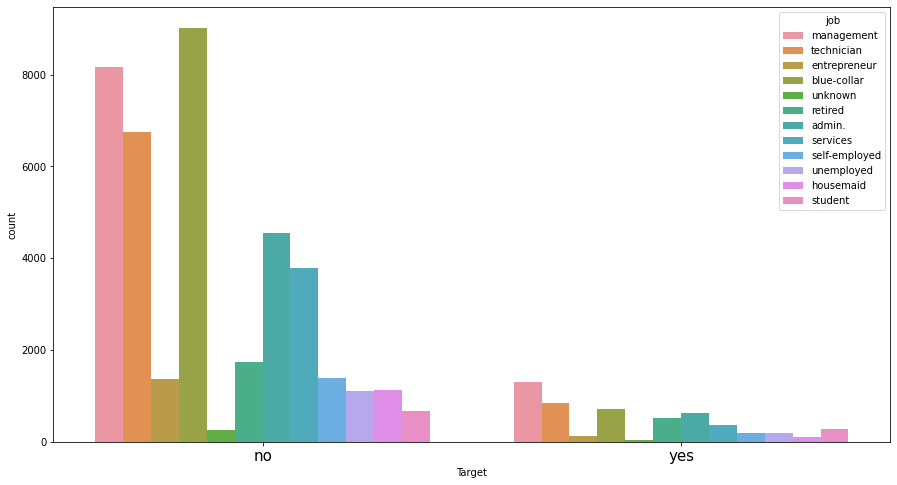

In [12]:
f, ax = plt.subplots(figsize=(15, 8))
sns.countplot(data=df, x="Target", hue="job", ax=ax)
ax.tick_params(axis='x', labelsize=15)

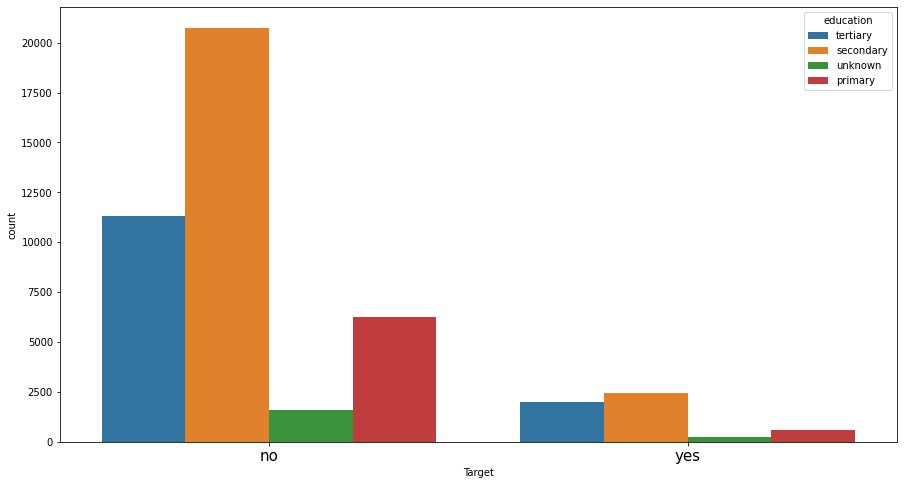

In [13]:
f, ax = plt.subplots(figsize=(15, 8))
sns.countplot(data=df, x="Target", hue="education", ax=ax)
ax.tick_params(axis='x', labelsize=15)

From the above bar graphs we could see that people with different background of job and education significantly differ in making decisions on whether to submit a term deposit. 

Also, the two variables contain small scales of "unknown", hence it's necessary to assign some reasonable values to those "unknown"s.

It's common sense that one's education background will affect his/her career. 
Hence we draw the plots between `job` and `education` to find those potential relationships.

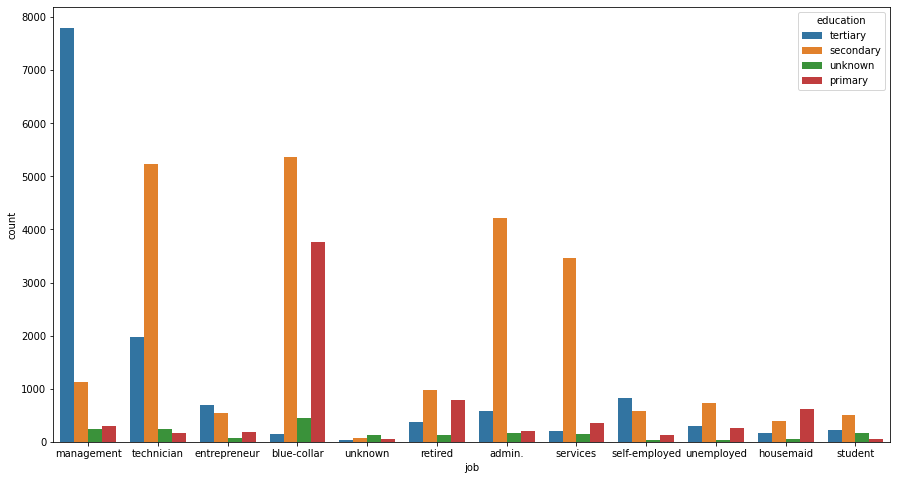

In [14]:
f, ax = plt.subplots(figsize=(15, 8))
sns.countplot(data=df, x="job", hue="education", ax=ax)
ax.tick_params(axis='x', labelsize=10)

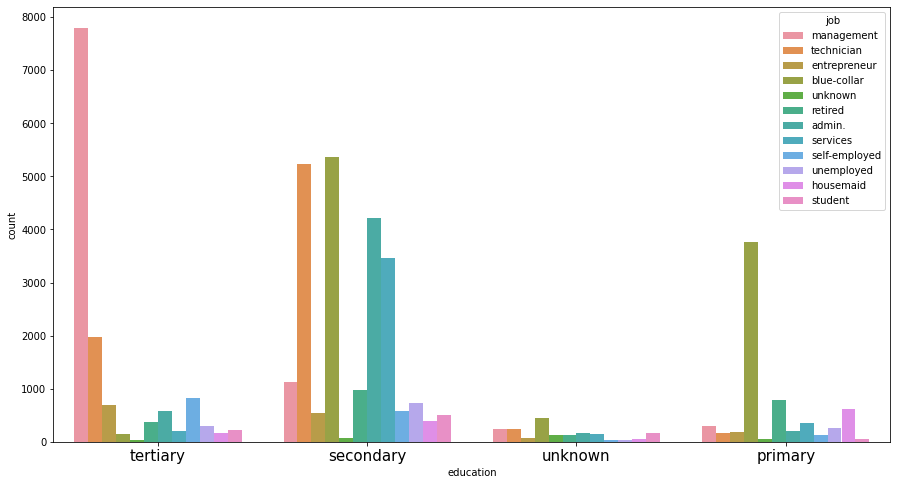

In [15]:
f, ax = plt.subplots(figsize=(15, 8))
sns.countplot(data=df, x="education", hue="job", ax=ax)
ax.tick_params(axis='x', labelsize=15)

From the above plots we could find the following relations:

`education` = "tertiary" ~ `job` = "management";

`education` = "secondary" ~ `job` = "techinician", "blue-collar", "admin.", "services";

`education` = "primary" ~ `job` = "techinician"

Also, it's common sense that `age` will affect one's vocational status (retired/unretired for example), hence we draw the plot between `age` and `job`/`education` to find the relationships.

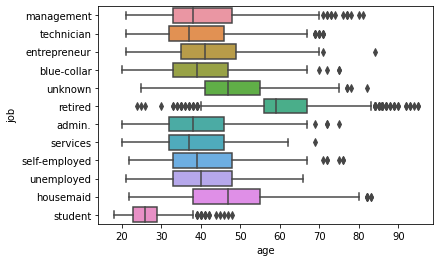

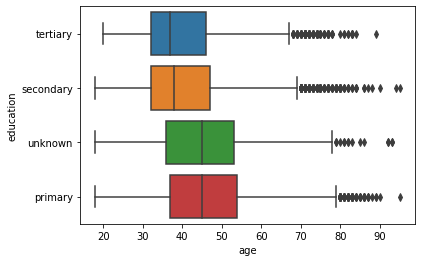

In [16]:
sns.boxplot(x="age", y="job", data=df)
plt.show()
sns.boxplot(x="age", y="education", data=df)
plt.show()

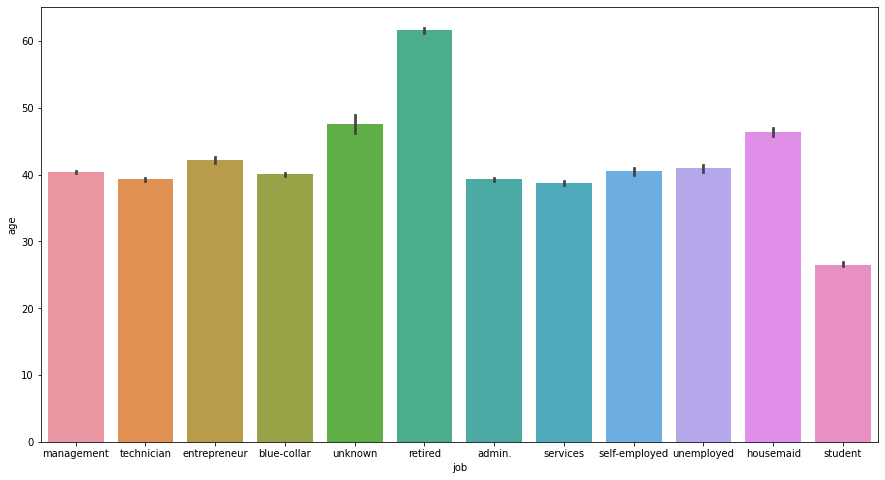

In [17]:
f, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x="job", y="age", data=df)
ax.tick_params(axis='x', labelsize=10)

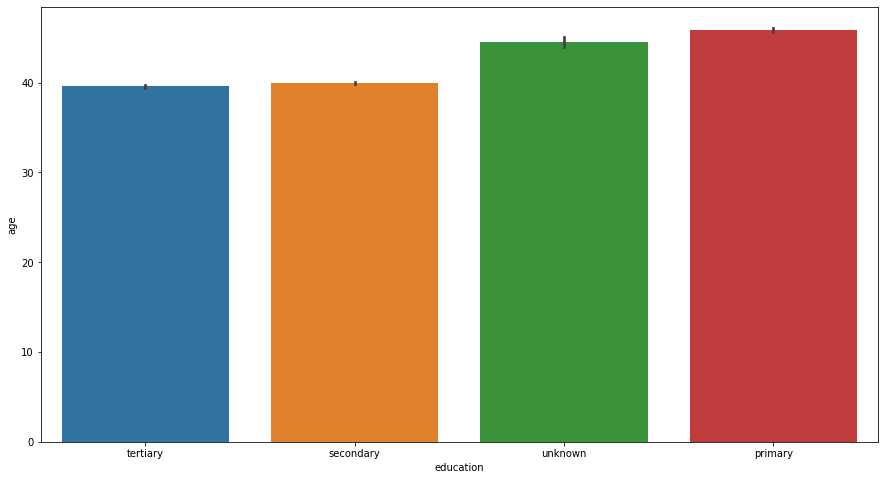

In [18]:
f, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x="education", y="age", data=df)
ax.tick_params(axis='x', labelsize=10)

From the above plots we could see that the "unknown"s in `job` are around 50 years old, 
hence we could view those "unknown"s as "retired" when their ages exceed 55,
and view them as "student" when their ages are less than 27.

Now we could reassign those "unknown" based on the above conclusions.

In [19]:
df.loc[(df["age"] > 55) & (df["job"] == "unknown"), "job"] = "retired"
df.loc[(df["age"] < 27) & (df["job"] == "unknown"), "job"] = "student"
df.loc[(df['job'] == 'unknown') & (df['education']=='primary'), 'job'] = "blue-collar"
df.loc[(df['job']=='unknown') & (df['education']=='tertiary'), 'job'] = "management"
df.loc[(df['job']=='unknown') & (df['education']=='secondary'), 'job'] = "technician"

df.loc[(df["education"] == "unknown") & 
       (
           (df["job"] == "management") |
           (df["job"] == "entrepreneur") | 
           (df["job"] == "self-employed")
       ), "education"] = "tertiary"

df.loc[(df["education"] == "unknown") & 
       (
           (df["job"] == "technician") |
           (df["job"] == "admin.") |
           (df["job"] == "services") |
           (df["job"] == "unemployed") |
           (df["job"] == "student") |
           (df["job"] == "blue-collar") |
           (df["job"] == "retired")
       ), "education"] = "secondary"

df.loc[(df["education"] == "unknown") & (df["job"] == "housemaid"), "education"] = "primary"

df = df[~((df["education"] == "unknown") & (df["job"] == "unknown"))]

In [20]:
for col in ["job", "education"]:
    print(f"=== {col} ===")
    print(df.groupby(df[col])[col].count(),"\n")

=== job ===
job
admin.           5171
blue-collar      9771
entrepreneur     1487
housemaid        1240
management       9488
retired          2335
self-employed    1579
services         4154
student           943
technician       7651
unemployed       1303
Name: job, dtype: int64 

=== education ===
education
primary       6896
secondary    24568
tertiary     13658
Name: education, dtype: int64 



Now we process the `month` and `day` variables.

We combine the two variables together to build a new variable `date`.

In [21]:
months = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]
months_num = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12"]

for i in range(12):
    df.loc[df["month"] == months[i], "month"] = months_num[i]

df["day_str"] = df["day"].map(lambda x : str(np.int64(x)))
df["date"] = "2019-" + df["month"].str.cat(df["day_str"], sep="-")
df["date"] = pd.to_datetime(df["date"])

In [22]:
df["date"].describe(datetime_is_numeric=True)

count                            45122
mean     2019-06-20 04:23:19.086919936
min                2019-01-06 00:00:00
25%                2019-05-09 00:00:00
50%                2019-06-04 00:00:00
75%                2019-08-05 00:00:00
max                2019-12-31 00:00:00
Name: date, dtype: object

We convert the `date` into timestamp in order to make sure it is numerical.

In [23]:
df["date"] = df["date"].apply(lambda x : datetime.timestamp(x)) - datetime(2019, 1, 1).timestamp()

In [24]:
df["date"].describe()

count    4.512200e+04
mean     1.470087e+07
std      6.446419e+06
min      4.320000e+05
25%      1.105560e+07
50%      1.330200e+07
75%      1.865880e+07
max      3.144960e+07
Name: date, dtype: float64

Now remove the redundant `day` and `month`.

In [25]:
df = df.drop(["day", "month", "day_str"], axis=1)
df.head(1)

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,Target,date
0,58,management,married,tertiary,no,2143,yes,no,261,1,-1,0,no,10710000.0


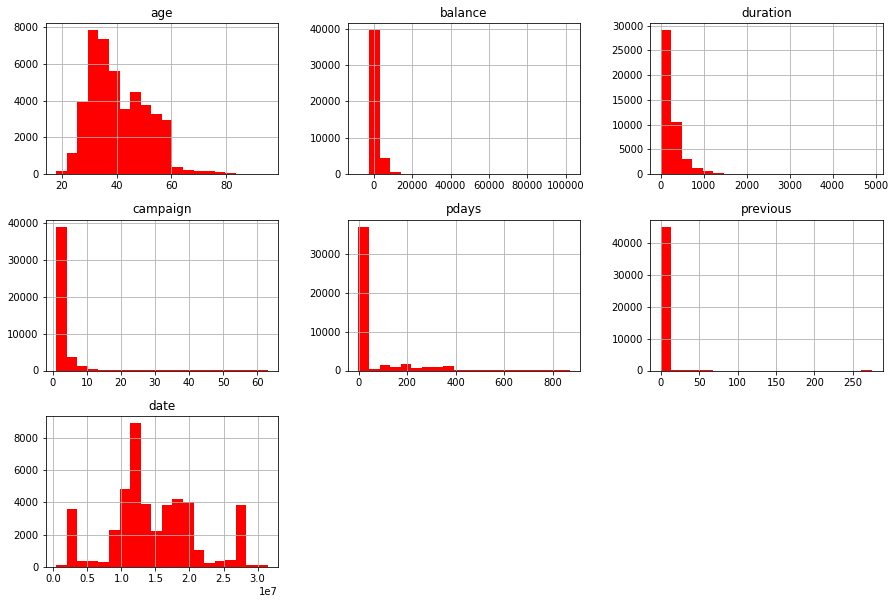

In [26]:
df.hist(bins=20, figsize=(15,10), color='red')
plt.show()

Now we plot those numerical variables.

From the above plots we could see that `age` and `date` approximately carry normality, hence we normalise the two variables and standardize the remaining variables.

In [27]:
numerical_cols = list(df.select_dtypes(exclude=['object']))
for col in numerical_cols:
    if (col != "age") | (col != "date"):
        df[col] = (df[col] - np.min(df[col])) / (np.max(df[col]) - np.min(df[col]))
        
df["date"] = (df["date"] - np.mean(df["date"])) / np.std(df["date"], ddof=1)
df["age"] = (df["age"] - np.mean(df["age"])) / np.std(df["age"], ddof=1)
        

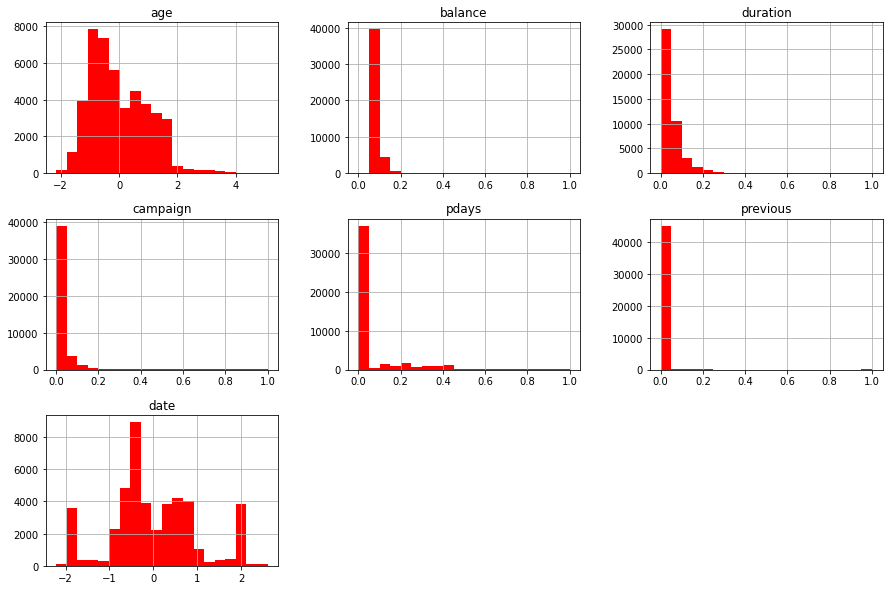

In [28]:
df.hist(bins=20, figsize=(15,10), color='red')
plt.show()

Now we check whether there are relationships between the numerical variables and `Target`.

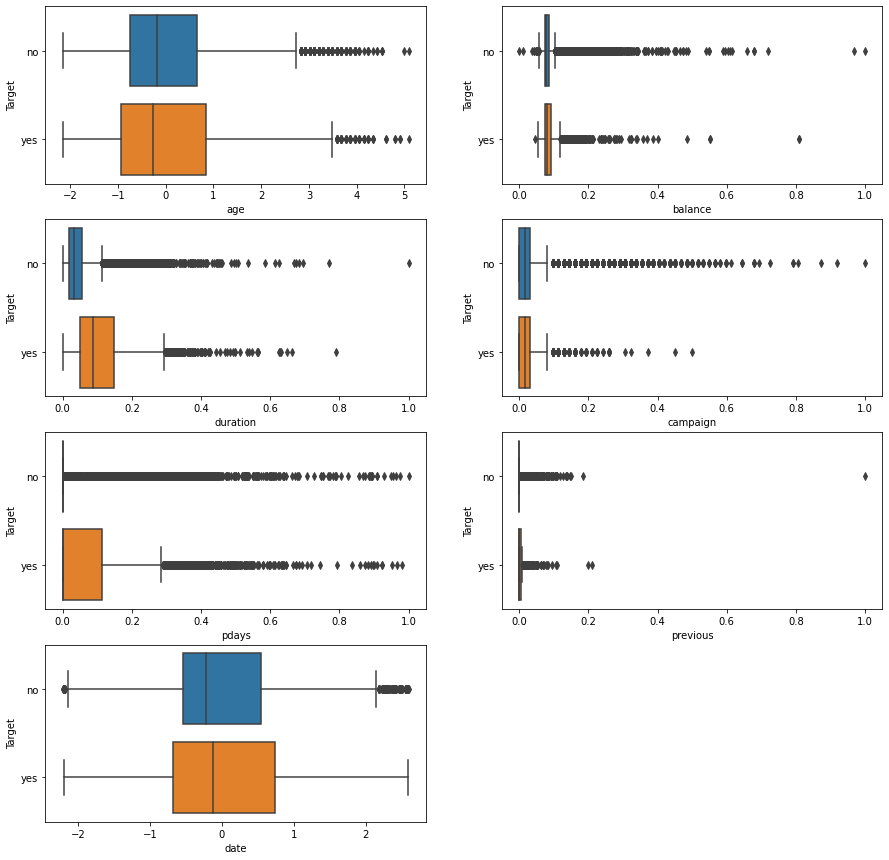

In [29]:
plt.figure(figsize=(15, 15))
i = 1
for col in numerical_cols:
    plt.subplot(4, 2, i)
    i = i + 1
    sns.boxplot(x=df[col], y="Target", data=df)

From the above plots we could see that `previous` does not have significant influence on `Target`, hence we remove it.

In [30]:
df = df.drop(["previous"], axis=1)
df.head(2)

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,Target,date
0,1.606901,management,married,tertiary,no,0.092259,yes,no,0.053070,0.0,0.0,no,-0.619083
1,0.289150,technician,single,secondary,no,0.073067,yes,no,0.030704,0.0,0.0,no,-0.619083


Now we check whether there are relationships between the categorical variables and `Target`.

In [31]:
category_cols = list(df.select_dtypes(include=['object']))
category_cols.pop()
category_cols

['job', 'marital', 'education', 'default', 'housing', 'loan']

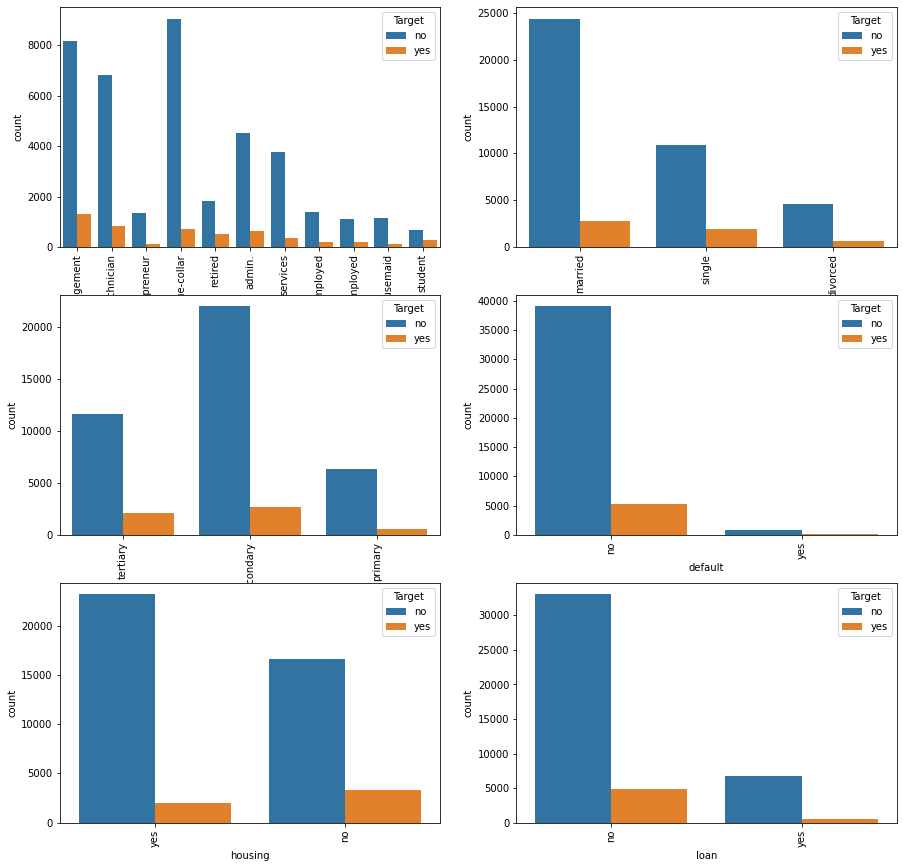

In [32]:
f, ax = plt.subplots(figsize=(15, 15))
i = 1
for col in category_cols:
    plt.subplot(3, 2, i)
    i = i + 1
    sns.countplot(x=df[col], hue="Target", data=df)
    ax.tick_params(axis='x', labelsize=10)
    plt.xticks(rotation=90)

Hence those categorical variables also have influence on `Target`.

Now we convert the categories into integers (0, 1).

In [33]:
for col in ["default", "housing", "loan", "Target"]:
    df[col] = df[col].map({"yes" : 1 , "no" : 0}) 

In [34]:
cols_new = [col for col in df.columns]
for col in cols_new:
    print(f"=== {col} ===")
    print(df.groupby(df[col])[col].count(), "\n")

=== age ===
age
-2.158100     12
-2.063975     35
-1.969850     50
-1.875725     79
-1.781600    129
            ... 
 4.618902      2
 4.807152      2
 4.901277      2
 4.995402      1
 5.089527      2
Name: age, Length: 77, dtype: int64 

=== job ===
job
admin.           5171
blue-collar      9771
entrepreneur     1487
housemaid        1240
management       9488
retired          2335
self-employed    1579
services         4154
student           943
technician       7651
unemployed       1303
Name: job, dtype: int64 

=== marital ===
marital
divorced     5205
married     27151
single      12766
Name: marital, dtype: int64 

=== education ===
education
primary       6896
secondary    24568
tertiary     13658
Name: education, dtype: int64 

=== default ===
default
0    44308
1      814
Name: default, dtype: int64 

=== balance ===
balance
0.000000    1
0.010640    1
0.035970    1
0.042189    1
0.042725    1
           ..
0.678554    1
0.719109    1
0.810043    2
0.966317    1
1.000000  

Create dummy variables for the remaining `job`, `education` and `marital.`

In [35]:
job_dmy = pd.get_dummies(df['job'], prefix='job')
job_dmy_rmv_student = job_dmy.drop(["job_student"], axis=1)
df = pd.concat([df, job_dmy_rmv_student], axis=1)

edu_dmy = pd.get_dummies(df['education'], prefix='edu')
edu_dmy_rmv_pri = edu_dmy.drop(["edu_primary"], axis=1)
df = pd.concat([df, edu_dmy_rmv_pri], axis=1)

mrt_dmy = pd.get_dummies(df['marital'], prefix='marital')
mrt_dmy_rmv_div = mrt_dmy.drop(["marital_divorced"], axis=1)
df = pd.concat([df, mrt_dmy_rmv_div], axis=1)

df = df.drop(["job", "education", "marital"], axis=1)
df.head(2)

,age,default,balance,housing,loan,duration,campaign,pdays,Target,date,...,job_management,job_retired,job_self-employed,job_services,job_technician,job_unemployed,edu_secondary,edu_tertiary,marital_married,marital_single
0,1.606901,0,0.092259,1,0,0.053070,0.0,0.0,0,-0.619083,...,1,0,0,0,0,0,0,1,1,0
1,0.289150,0,0.073067,1,0,0.030704,0.0,0.0,0,-0.619083,...,0,0,0,0,1,0,1,0,0,1


Draw the correlation matrix to check the relationships between those variables and `Target`.

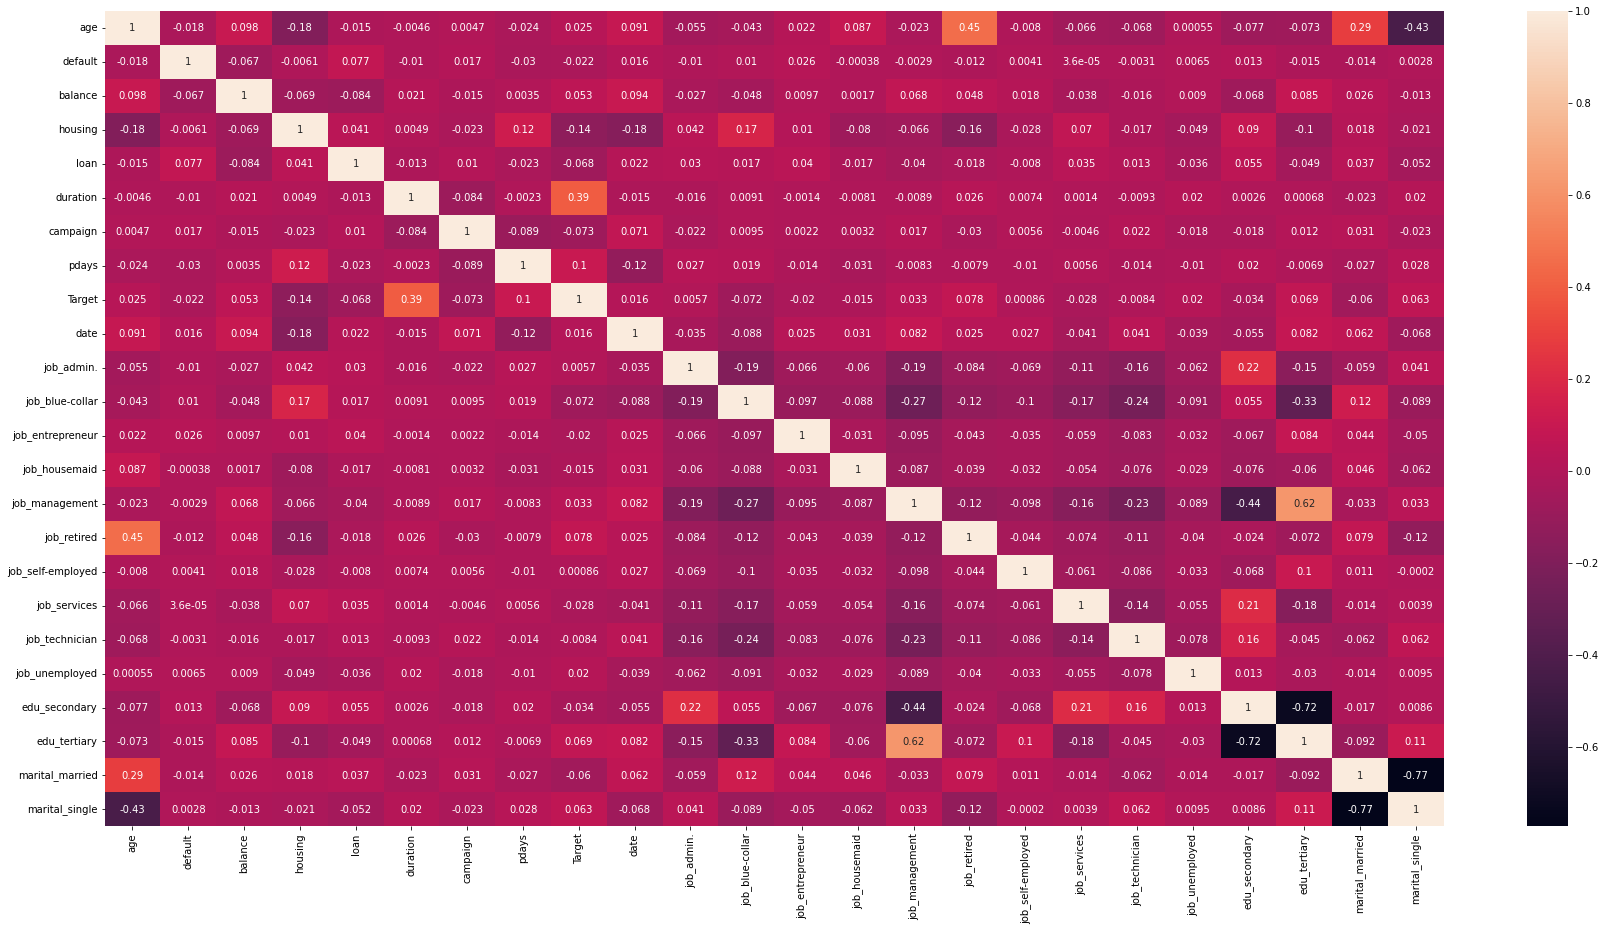

In [36]:
plt.figure(figsize=(30, 15))       
sns.heatmap(df.corr(), annot=True)
plt.show()

Create predictor vector x and redraw the correlation matrix to check the multicolinearity.

In [37]:
x = df.drop(["Target"], axis=1)
y = df["Target"]

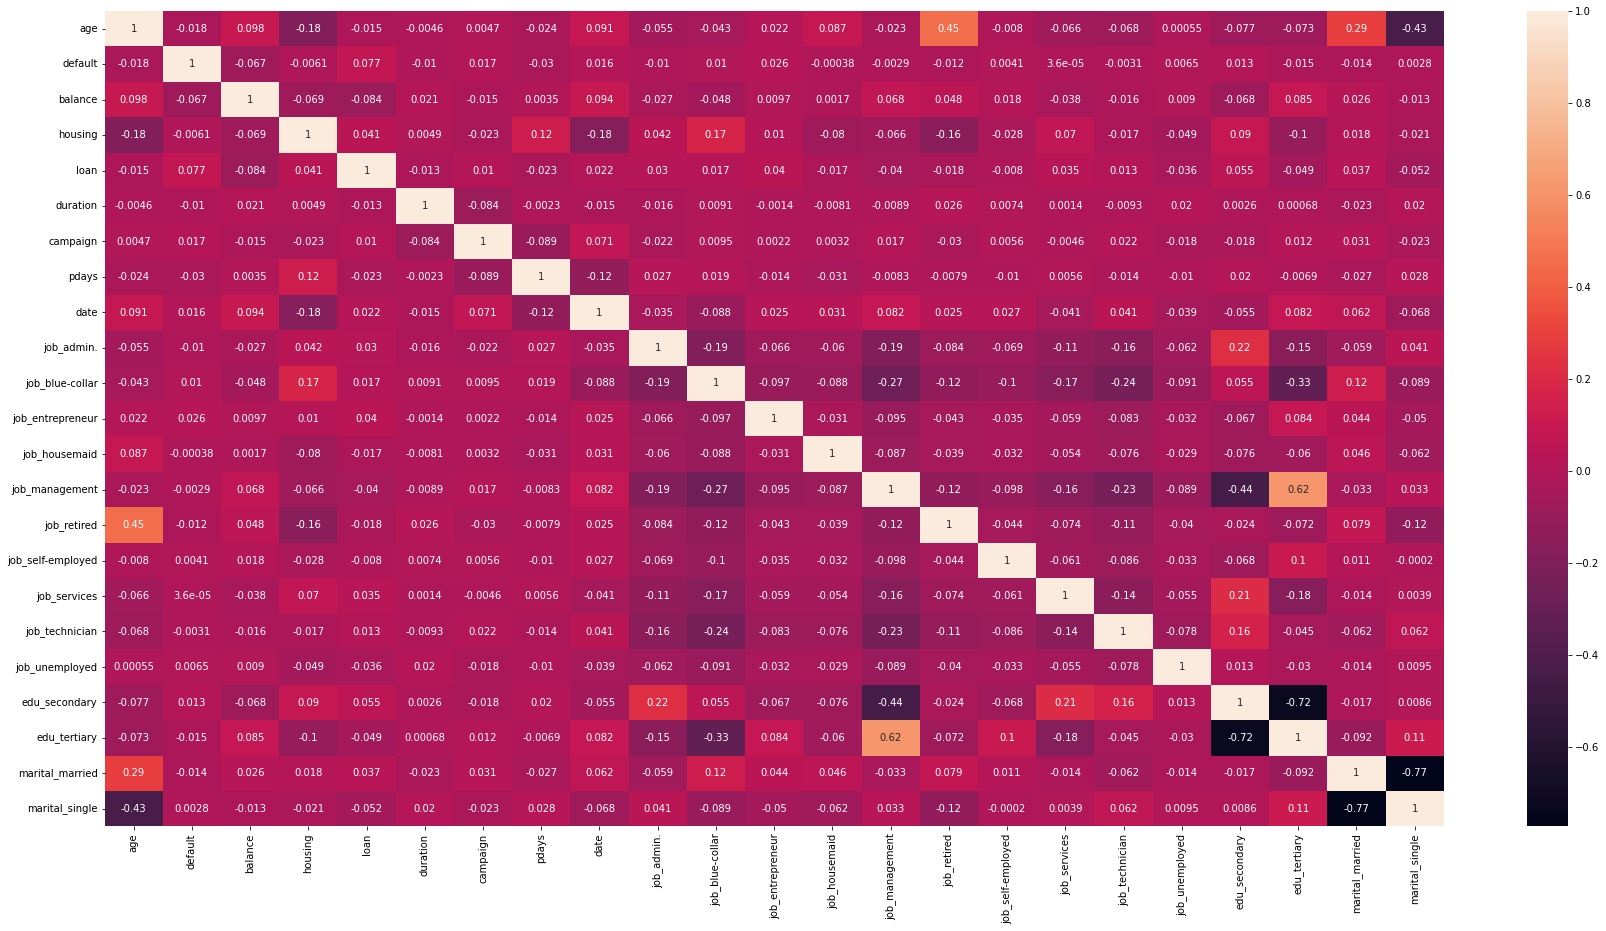

In [38]:
plt.figure(figsize=(30, 15))       
sns.heatmap(x.corr(), annot=True)
plt.show()

Now we separate the train and test sets.

In [39]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3, random_state=True)

print(x_train.shape)
print(y_train.shape)

(31585, 23)
(31585,)


# Model Construction

## Logistic Regression from GLM

First we check the multicolinearity using "VIF".

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [41]:
x_vif = [variance_inflation_factor(x.values, x.columns.get_loc(i)) for i in x.columns]
x_vif_df = pd.Series(x_vif, index=x.columns)
x_vif_df

age                  1.675165
default              1.031104
balance              9.579052
housing              2.591765
loan                 1.222665
duration             2.006102
campaign             1.347681
pdays                1.209173
date                 1.075169
job_admin.           3.191738
job_blue-collar      4.824380
job_entrepreneur     1.696805
job_housemaid        1.427713
job_management       6.036898
job_retired          2.284530
job_self-employed    1.730320
job_services         2.752492
job_technician       4.296817
job_unemployed       1.504068
edu_secondary        5.049066
edu_tertiary         4.679608
marital_married      5.777105
marital_single       3.547310
dtype: float64

Now we could see that all the values of VIF are less than 10, 
hence we could assert that there is no obvious multicolinearity in the predictors.

Next we build the full model.

In [42]:
import statsmodels.api as sm
lr1 = sm.GLM(y_train, (sm.add_constant(x_train)), family=sm.families.Binomial()).fit()
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Target   No. Observations:                31585
Model:                            GLM   Df Residuals:                    31561
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8623.3
Date:                Mon, 10 Jan 2022   Deviance:                       17247.
Time:                        01:12:25   Pearson chi2:                 6.96e+06
No. Iterations:                     7   Pseudo R-squ. (CS):             0.1648
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.3974      0.146    -16.386      0.000      -2.684      -2.111
age                   0.0360      0.026      1.398      0.162      -0.014       0.087
default              -0.2252      0.187     -1.206      0.228      -0.591       0.141
balance               2.1444      0.598      3.588      0.000       0.973       3.316
housing              -1.0859      0.045    -24.099      0.000      -1.174      -0.998
loan                 -0.5705      0.067     -8.518      0.000      -0.702      -0.439
duration             19.2260      0.354     54.371      0.000      18.533      19.919
campaign             -7.8291      0.718    -10.902      0.000      -9.237      -6.422
pdays                 3.2850      0.149     22.062      0.000       2.993       3.577
date                  0.0089      0.019      0.467      0.641      -0.029       0.046
job_admin.           -0.6534      0.117     -5.571      0.000      -0.883      -0.424
job_blue-collar      -1.1558      0.118     -9.763      0.000      -1.388      -0.924
job_entrepreneur     -1.3698      0.169     -8.125      0.000      -1.700      -1.039
job_housemaid        -1.2500      0.175     -7.143      0.000      -1.593      -0.907
job_management       -0.9625      0.118     -8.191      0.000      -1.193      -0.732
job_retired          -0.2774      0.142     -1.951      0.051      -0.556       0.001
job_self-employed    -1.1594      0.151     -7.659      0.000      -1.456      -0.863
job_services         -1.0781      0.128     -8.452      0.000      -1.328      -0.828
job_technician       -0.9108      0.114     -8.007      0.000      -1.134      -0.688
job_unemployed       -0.8478      0.148     -5.734      0.000      -1.138      -0.558
edu_secondary         0.1970      0.071      2.757      0.006       0.057       0.337
edu_tertiary          0.6227      0.083      7.464      0.000       0.459       0.786
marital_married      -0.0969      0.065     -1.482      0.138      -0.225       0.031
marital_single        0.2463      0.074      3.323      0.001       0.101       0.392
=====================================================================================
"""

We see that the p-value for `age`, `date` and `default` is larger than 0.05, hence according to Wald t-test we fail to reject $H_0$ and assert that there does not exist a relationship between `Target` and those variables.

We remove those variables to construct a new model.

In [43]:
x_train = x_train.drop(["age", "date", "default"], axis=1)
x_test = x_test.drop(["age", "date", "default"], axis=1)

In [44]:
lr2 = sm.GLM(y_train, (sm.add_constant(x_train)), family=sm.families.Binomial()).fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Target   No. Observations:                31585
Model:                            GLM   Df Residuals:                    31564
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8625.1
Date:                Mon, 10 Jan 2022   Deviance:                       17250.
Time:                        01:12:25   Pearson chi2:                 6.46e+06
No. Iterations:                     7   Pseudo R-squ. (CS):             0.1647
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.4145      0.146    -16.542      0.000      -2.701      -2.128
balance               2.2728      0.592      3.839      0.000       1.112       3.433
housing              -1.0972      0.044    -24.806      0.000      -1.184      -1.011
loan                 -0.5790      0.067     -8.673      0.000      -0.710      -0.448
duration             19.2271      0.354     54.391      0.000      18.534      19.920
campaign             -7.8029      0.717    -10.890      0.000      -9.207      -6.399
pdays                 3.2888      0.148     22.162      0.000       2.998       3.580
job_admin.           -0.6259      0.115     -5.428      0.000      -0.852      -0.400
job_blue-collar      -1.1345      0.117     -9.701      0.000      -1.364      -0.905
job_entrepreneur     -1.3383      0.166     -8.050      0.000      -1.664      -1.012
job_housemaid        -1.2042      0.172     -7.016      0.000      -1.541      -0.868
job_management       -0.9313      0.115     -8.099      0.000      -1.157      -0.706
job_retired          -0.1850      0.125     -1.478      0.139      -0.430       0.060
job_self-employed    -1.1335      0.150     -7.568      0.000      -1.427      -0.840
job_services         -1.0543      0.126     -8.362      0.000      -1.301      -0.807
job_technician       -0.8824      0.112     -7.904      0.000      -1.101      -0.664
job_unemployed       -0.8196      0.146     -5.617      0.000      -1.106      -0.534
edu_secondary         0.1874      0.071      2.635      0.008       0.048       0.327
edu_tertiary          0.6110      0.083      7.372      0.000       0.449       0.773
marital_married      -0.1012      0.065     -1.553      0.120      -0.229       0.026
marital_single        0.2113      0.070      3.029      0.002       0.075       0.348
=====================================================================================
"""

In [45]:
vif_drop = [variance_inflation_factor(x_train.values, x_train.columns.get_loc(i)) for i in x_train.columns]
vif_drop_df = pd.Series(vif_drop, index=x_train.columns)
vif_drop_df

balance              9.359238
housing              2.476406
loan                 1.213205
duration             1.994595
campaign             1.351180
pdays                1.198202
job_admin.           3.068735
job_blue-collar      4.680047
job_entrepreneur     1.689456
job_housemaid        1.390453
job_management       5.801702
job_retired          1.822776
job_self-employed    1.700590
job_services         2.693466
job_technician       4.151345
job_unemployed       1.485248
edu_secondary        4.942571
edu_tertiary         4.626861
marital_married      5.694939
marital_single       3.121394
dtype: float64

We recompute the VIF for the new model and find that those values of VIF are also less than 10, 

hence we could assert that there is no obvious multicolinearity in the new model.

Now we conduct an ANOVA F-test to test whether the small model is enough for our regression. The hypotheses are as follows:

$H_0: \beta_{age} = \beta_{date} = \beta_{default}=0$, $H_1: Otherwise$

We use the following function to compute the F-statistic and p-value for the F-test.

In [46]:
from scipy import stats
def calculate_nested_f_statistic(small_model, big_model):
    addtl_params = big_model.df_model - small_model.df_model
    f_stat = (small_model.deviance - big_model.deviance) / (addtl_params * big_model.scale)
    df_numerator = addtl_params
    # use fitted values to obtain n_obs from model object:
    df_denom = (big_model.fittedvalues.shape[0] - big_model.df_model)
    p_value = stats.f.sf(f_stat, df_numerator, df_denom)
    return (f_stat, p_value)

In [47]:
f_stat, p_value = calculate_nested_f_statistic(lr2, lr1)
print(f"The p-value for the ANOVA F-test is {round(p_value, 3)}.")

The p-value for the ANOVA F-test is 0.288.


The p-value is greater than 0.05, hence we fail to reject $H_0$ and assert that the small model is enough for our regression.

Also we could see that the age of the customers and the date they are contacted do not affect their decisions on subscriptions, which is coincided with our real life.

Now we use the small model to conduct the Logistic Regression.

In [48]:
x_train_sm = sm.add_constant(x_train)
x_train_pred = lr2.predict(x_train_sm)
train_results = pd.concat([y_train, x_train_pred], keys=["Target", "Predicted_Prob"], axis=1)
for i in np.arange(0.05, 1, 0.05):
    train_results[i] = train_results.Predicted_Prob.map(lambda x: 1 if x > i else 0)
    
train_results.head()

,Target,Predicted_Prob,0.05,0.1,0.15000000000000002,0.2,0.25,0.3,0.35000000000000003,0.4,...,0.5,0.55,0.6000000000000001,0.6500000000000001,0.7000000000000001,0.7500000000000001,0.8,0.8500000000000001,0.9000000000000001,0.9500000000000001
26867,0,0.130871,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29917,0,0.029537,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13519,0,0.017248,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16987,0,0.328355,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
12118,0,0.015805,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now we draw the ROC curve.

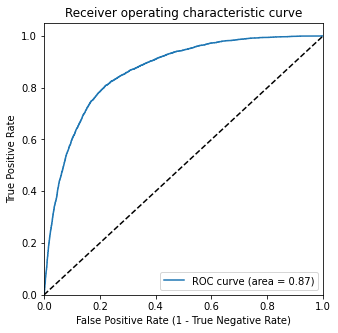

In [49]:
from sklearn import metrics
def draw_roc(labels, prob):
    fpr, tpr, thresholds = metrics.roc_curve(labels, prob, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(labels, prob)
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label=f"ROC curve (area = {round(auc_score, 2)})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (1 - True Negative Rate)')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    plt.show()

draw_roc(train_results.Target, train_results.Predicted_Prob)

The ROC curve indicates that our model is good for classifying the choices for subscribing a term deposit.

Now we compute the accuracy, sensitivity and specificity for different probability thresholds.
The three values should all be as close as possible to 1 since accuracy represents the rate that the "Yes"s or "No"s are classified correctly;

Sensitivity represents the rate that the "Yes"s are classified correctly;

Specificity represents the rate that the "No"s are classified correctly.

In [50]:
train_performance = pd.DataFrame(columns=['threshold', 'accuracy', 'sensitivity', 'specificity'])
for i in np.arange(0.05, 1, 0.05):
    confus_mat = metrics.confusion_matrix(train_results["Target"], train_results[i])
    tp = confus_mat[1, 1] # true positive
    tn = confus_mat[0, 0] # true negative
    fp = confus_mat[0, 1] # false positive
    fn = confus_mat[1, 0] # false negative
    
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    specificity = tn / (tn + fp)
    sensitivity = tp /(fn + tp)
    train_performance.loc[i] = [i, accuracy, sensitivity, specificity]
    
train_performance

,threshold,accuracy,sensitivity,specificity
0.05,0.05,0.538737,0.949853,0.483702
0.10,0.10,0.750103,0.837222,0.738441
0.15,0.15,0.832515,0.717082,0.847968
0.20,0.20,0.864936,0.600697,0.900309
0.25,0.25,0.879341,0.495843,0.930679
0.30,0.30,0.886085,0.416466,0.948952
0.35,0.35,0.889093,0.348619,0.961445
0.40,0.40,0.890074,0.295253,0.969701
0.45,0.45,0.890518,0.250201,0.976235
0.50,0.50,0.890043,0.212389,0.980758


<AxesSubplot:xlabel='threshold'>

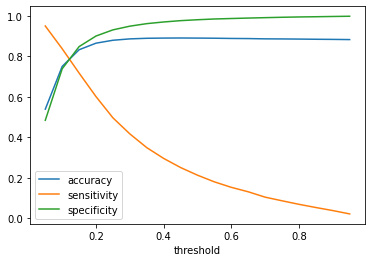

In [51]:
train_performance.plot.line(x='threshold', y=['accuracy', 'sensitivity', 'specificity'])

From the above plot we could see that when the threshold is 0.15 the three values remain on a relatively high level. Hence we choose the threshold as 0.15.

Now we apply the model on the test set.

In [52]:
x_test_sm = sm.add_constant(x_test)
x_test_pred = lr2.predict(x_test_sm)
test_results = pd.concat([y_test, x_test_pred], keys=["Target", "Predicted_Prob"], axis=1)
test_results["Prediction"] = test_results.Predicted_Prob.map(lambda x: 1 if x > 0.15 else 0)
test_results.head()

,Target,Predicted_Prob,Prediction
5190,0,0.014354,0
16728,1,0.222449,1
821,0,0.022697,0
39587,0,0.064453,0
36364,0,0.052131,0


In [53]:
test_confus_mat = metrics.confusion_matrix(test_results["Target"], test_results["Prediction"])

In [54]:
tp = test_confus_mat[1, 1] 
tn = test_confus_mat[0, 0] 
fp = test_confus_mat[0, 1] 
fn = test_confus_mat[1, 0] 
    
accuracy = (tp + tn) / (tp + tn + fp + fn)
specificity = tn / (tn + fp)
sensitivity = tp / (fn + tp)

performances = pd.DataFrame(columns=['accuracy', 'sensitivity', 'specificity'])
performances.loc["GLM Logistic"] = [accuracy, sensitivity, specificity]

performances

,accuracy,sensitivity,specificity
GLM Logistic,0.825958,0.693351,0.843093


## Logistic Regression from Sklearn

In [55]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)

In [56]:
lr_confus_mat = metrics.confusion_matrix(y_test, y_pred_lr)
tp = lr_confus_mat[1, 1] 
tn = lr_confus_mat[0, 0] 
fp = lr_confus_mat[0, 1] 
fn = lr_confus_mat[1, 0]

accuracy = (tp + tn) / (tp + tn + fp + fn)
specificity = tn / (tn + fp)
sensitivity = tp / (fn + tp)
performances.loc["Sklearn Logistic"] = [accuracy, sensitivity, specificity]
performances

,accuracy,sensitivity,specificity
GLM Logistic,0.825958,0.693351,0.843093
Sklearn Logistic,0.894142,0.189800,0.985152


## K-Nearest Neighbor

In [57]:
from sklearn.neighbors import KNeighborsClassifier

We check how the numbers of neighbors influence our classification results.

In [58]:
knn_performance = pd.DataFrame(columns=['k', 'accuracy', 'sensitivity', 'specificity'])
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)  # n_neighbors means k
    knn.fit(x_train, y_train)
    y_pred_knn = knn.predict(x_test)
    confus_mat = metrics.confusion_matrix(y_test, y_pred_knn)
    tp = confus_mat[1, 1] 
    tn = confus_mat[0, 0]
    fp = confus_mat[0, 1] 
    fn = confus_mat[1, 0] 
    
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    specificity = tn / (tn + fp)
    sensitivity = tp /(fn + tp)
    knn_performance.loc[i] = [i, accuracy, sensitivity, specificity]
    
knn_performance

,k,accuracy,sensitivity,specificity
1,1.0,0.850853,0.382828,0.911328
2,2.0,0.882396,0.173015,0.974057
3,3.0,0.875674,0.327954,0.946446
4,4.0,0.887863,0.195610,0.977311
5,5.0,0.886976,0.308586,0.961712
6,6.0,0.890744,0.209167,0.978812
7,7.0,0.889488,0.278890,0.968385
8,8.0,0.892147,0.200775,0.981481
9,9.0,0.890301,0.256940,0.972139
10,10.0,0.889266,0.181407,0.980731


<AxesSubplot:xlabel='k'>

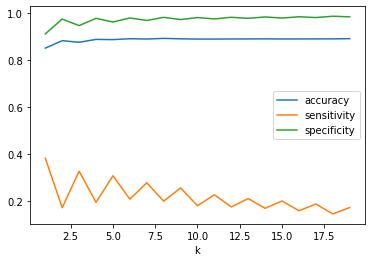

In [59]:
knn_performance.plot.line(x='k', y=['accuracy', 'sensitivity', 'specificity'])

From the above plot we could see that when `n_neighbors`=3 the three values remain on a relatively high level. Hence we choose the `n_neighbors` as 3.

In [60]:
knn = KNeighborsClassifier(n_neighbors=3)  
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
confus_mat = metrics.confusion_matrix(y_test, y_pred_knn)
tp = confus_mat[1, 1] 
tn = confus_mat[0, 0]
fp = confus_mat[0, 1] 
fn = confus_mat[1, 0] 
    
accuracy = (tp + tn) / (tp + tn + fp + fn)
specificity = tn / (tn + fp)
sensitivity = tp /(fn + tp)
performances.loc["KNN"] = [accuracy, sensitivity, specificity]
performances

,accuracy,sensitivity,specificity
GLM Logistic,0.825958,0.693351,0.843093
Sklearn Logistic,0.894142,0.189800,0.985152
KNN,0.875674,0.327954,0.946446


## Support Vector Machine

In [61]:
from sklearn.svm import SVC
svm = SVC(random_state=True)
svm.fit(x_train, y_train)
y_pred_svm = svm.predict(x_test)
confus_mat = metrics.confusion_matrix(y_test, y_pred_svm)
tp = confus_mat[1, 1] 
tn = confus_mat[0, 0]
fp = confus_mat[0, 1] 
fn = confus_mat[1, 0] 
    
accuracy = (tp + tn) / (tp + tn + fp + fn)
specificity = tn / (tn + fp)
sensitivity = tp /(fn + tp)
performances.loc["SVM"] = [accuracy, sensitivity, specificity]
performances

,accuracy,sensitivity,specificity
GLM Logistic,0.825958,0.693351,0.843093
Sklearn Logistic,0.894142,0.189800,0.985152
KNN,0.875674,0.327954,0.946446
SVM,0.885573,0.000000,1.000000


## Naive Bayes Classifier

In [62]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred_nb = nb.predict(x_test)
confus_mat = metrics.confusion_matrix(y_test, y_pred_nb)
tp = confus_mat[1, 1] 
tn = confus_mat[0, 0]
fp = confus_mat[0, 1] 
fn = confus_mat[1, 0] 
    
accuracy = (tp + tn) / (tp + tn + fp + fn)
specificity = tn / (tn + fp)
sensitivity = tp /(fn + tp)
performances.loc["Naive Bayes"] = [accuracy, sensitivity, specificity]
performances

,accuracy,sensitivity,specificity
GLM Logistic,0.825958,0.693351,0.843093
Sklearn Logistic,0.894142,0.189800,0.985152
KNN,0.875674,0.327954,0.946446
SVM,0.885573,0.000000,1.000000
Naive Bayes,0.829800,0.417043,0.883133


# Conclusion

From the above results we could see that all the algorithms could provide a high accuracy.
However, those good accuracies are mainly generated by high specificities which means we could succeed in classifying the "No"s. However, in order to achieve a good sensitivity, we should choose the Logistic Regression with a probability threshold of 0.15.